# Project name: Customer Churn Analysis


About Projet: We are going to examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. Here we need to build model which can predict customer churn.

In [57]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [58]:
# Importing Dataset

ds= pd.read_csv("Telecom_customer_churn.csv")
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df= pd.DataFrame(data= ds)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [60]:
df.shape

(7043, 21)

In [61]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [63]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [64]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observations: We can see that tenure is distributed from 0 to 72 where as MonthlyCharges from 18.25 to 118.75. Also there is more standard deviation for MonthlyCharges

In [65]:
#Checking for Null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observations: No null values are present in Dataset.

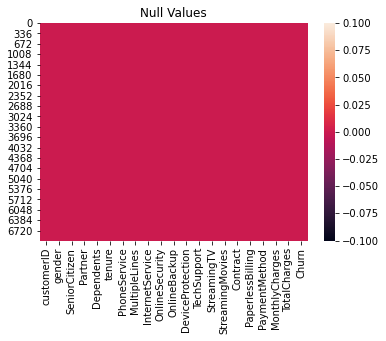

In [66]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Observations: No null values are present in Dataset.

# EDA

In [67]:
#Getting Unique Values for Object data type columns

for i in df.columns:
    if df[i].dtypes== 'object':
        print(str(i), ' : ', df[i].unique())
        print(df[i].value_counts())
        print()
        print()

customerID  :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
1589-AGTLK    1
3413-CSSTH    1
9631-RXVJM    1
5156-UMKOW    1
2782-LFZVW    1
             ..
9117-SHLZX    1
1839-UMACK    1
8155-IBNHG    1
8020-BWHYL    1
5902-WBLSE    1
Name: customerID, Length: 7043, dtype: int64


gender  :  ['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64


Partner  :  ['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents  :  ['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService  :  ['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines  :  ['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService  :  ['DSL' 'Fiber optic' 'No']
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity  :  ['No' 'Yes'

No     5174
Yes    1869
Name: Churn, dtype: int64


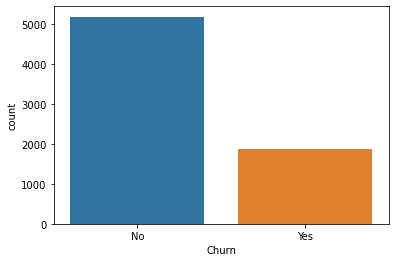

In [68]:
#Univariate Analysis

print(df['Churn'].value_counts())
sns.countplot(df['Churn'])

Observations: There is maximum no. of customers not churn.

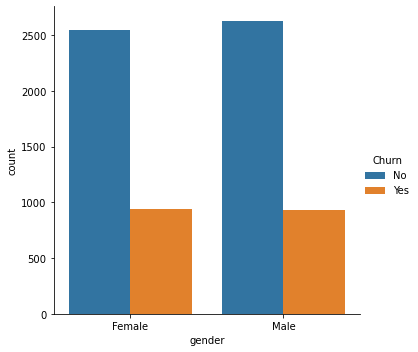

In [69]:
sns.catplot(x ="gender", hue ="Churn", kind ="count", data = df)

Observations: There is equal rate of customer churn for male and female.

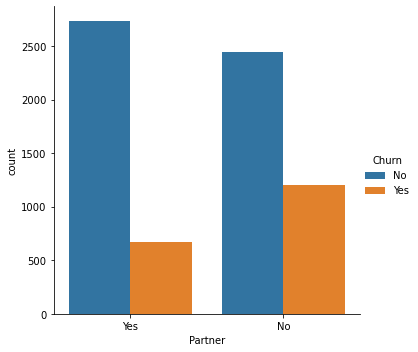

In [70]:
sns.catplot(x ="Partner", hue ="Churn", kind ="count", data = df)

Observations: There is maximum rate of customer churn for No partner customer.

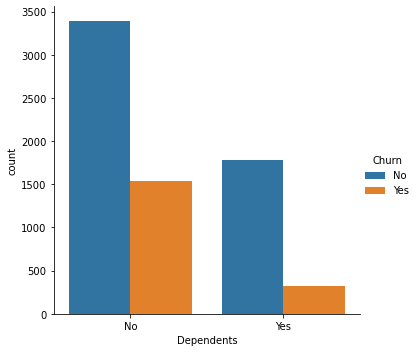

In [71]:
sns.catplot(x ="Dependents", hue ="Churn", kind ="count", data = df)

Observations: There is maximum rate of customer churn for No Dependents customer.

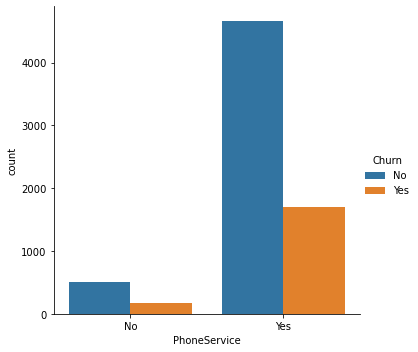

In [72]:
sns.catplot(x ="PhoneService", hue ="Churn", kind ="count", data = df)

Observations: There is maximum customers which having PhoneService.

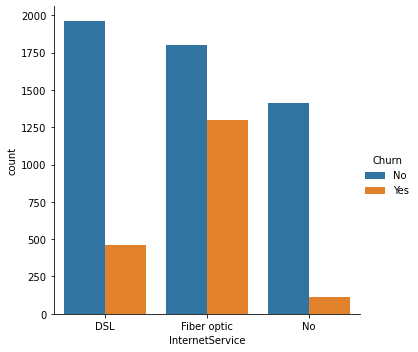

In [73]:
sns.catplot(x ="InternetService", hue ="Churn", kind ="count", data = df)

Observations: There is maximum customers which using Fiber optic InternetService where rate of customer churn is more.

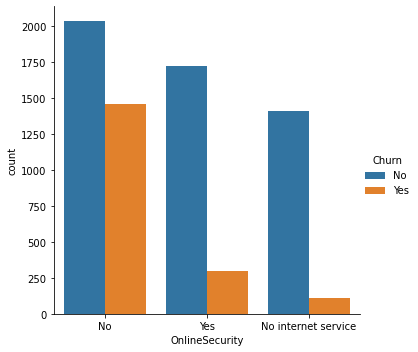

In [74]:
sns.catplot(x ="OnlineSecurity", hue ="Churn", kind ="count", data = df)

Observations: There is maximum customers which not using OnlineSexurity where rate of customer churn is also more.

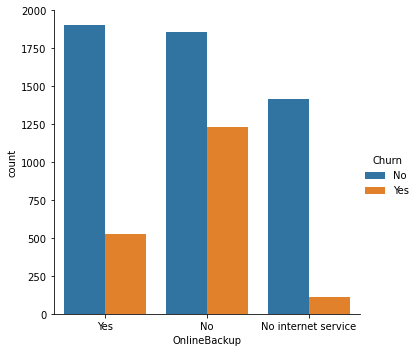

In [75]:
sns.catplot(x ="OnlineBackup", hue ="Churn", kind ="count", data = df)

Observations: There is maximum customers which not having OnlineBackup where rate of customer churn is also more.

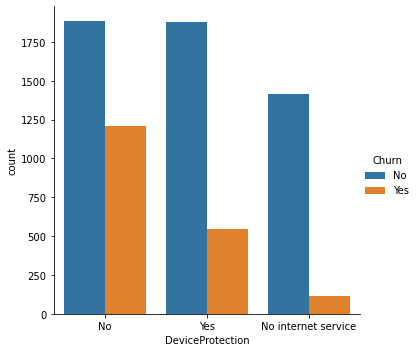

In [76]:
sns.catplot(x ="DeviceProtection", hue ="Churn", kind ="count", data = df)

Observations: There is maximum customers which not having DeviceProtection where rate of customer churn is also more.

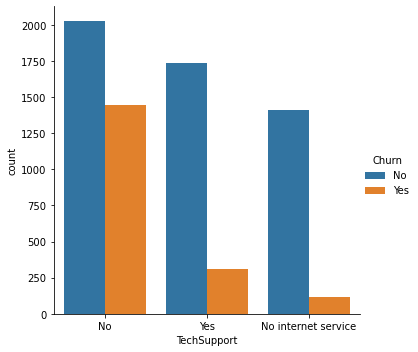

In [77]:
sns.catplot(x ="TechSupport", hue ="Churn", kind ="count", data = df)

Observations: There is maximum customers which not having TechSupport where rate of customer churn is also more.

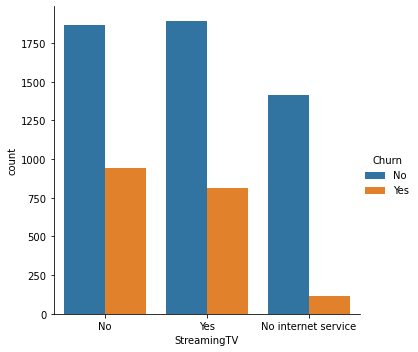

In [78]:
sns.catplot(x ="StreamingTV", hue ="Churn", kind ="count", data = df)

Observations: There is maximum customers which not using StreamingTV where rate of customer churn is also more.

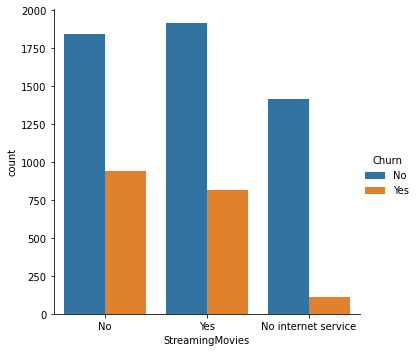

In [79]:
sns.catplot(x ="StreamingMovies", hue ="Churn", kind ="count", data = df)

Observations: There is maximum customers which not using StreamingMovies where rate of customer churn is also more.

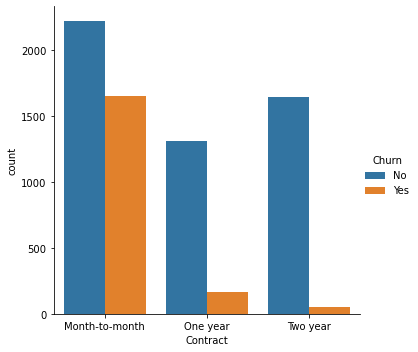

In [80]:
sns.catplot(x ="Contract", hue ="Churn", kind ="count", data = df)

Observations: There is maximum customers which having Month-to-month contract where rate of customer churn is also more.

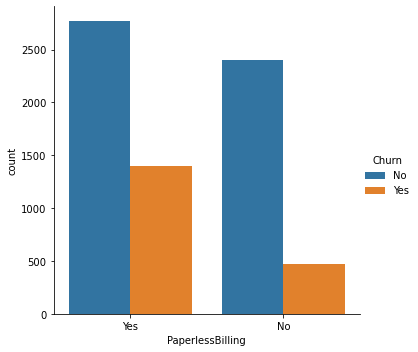

In [81]:
sns.catplot(x ="PaperlessBilling", hue ="Churn", kind ="count", data = df)

Observations: There is maximum customers which having PaperlessBilling where rate of customer churn is also more.

<Figure size 1080x576 with 0 Axes>

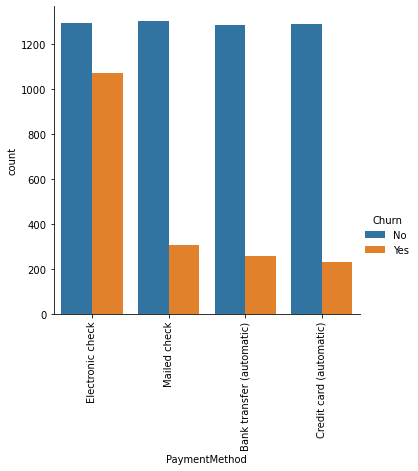

In [82]:
plt.figure(figsize=(15,8))
sns.catplot(x ="PaymentMethod", hue ="Churn", kind ="count", data = df)
plt.xticks(rotation=90)
plt.show()

Observations: There is maximum rate of customer churn for the customers which using Electronic check as paymentMethod.

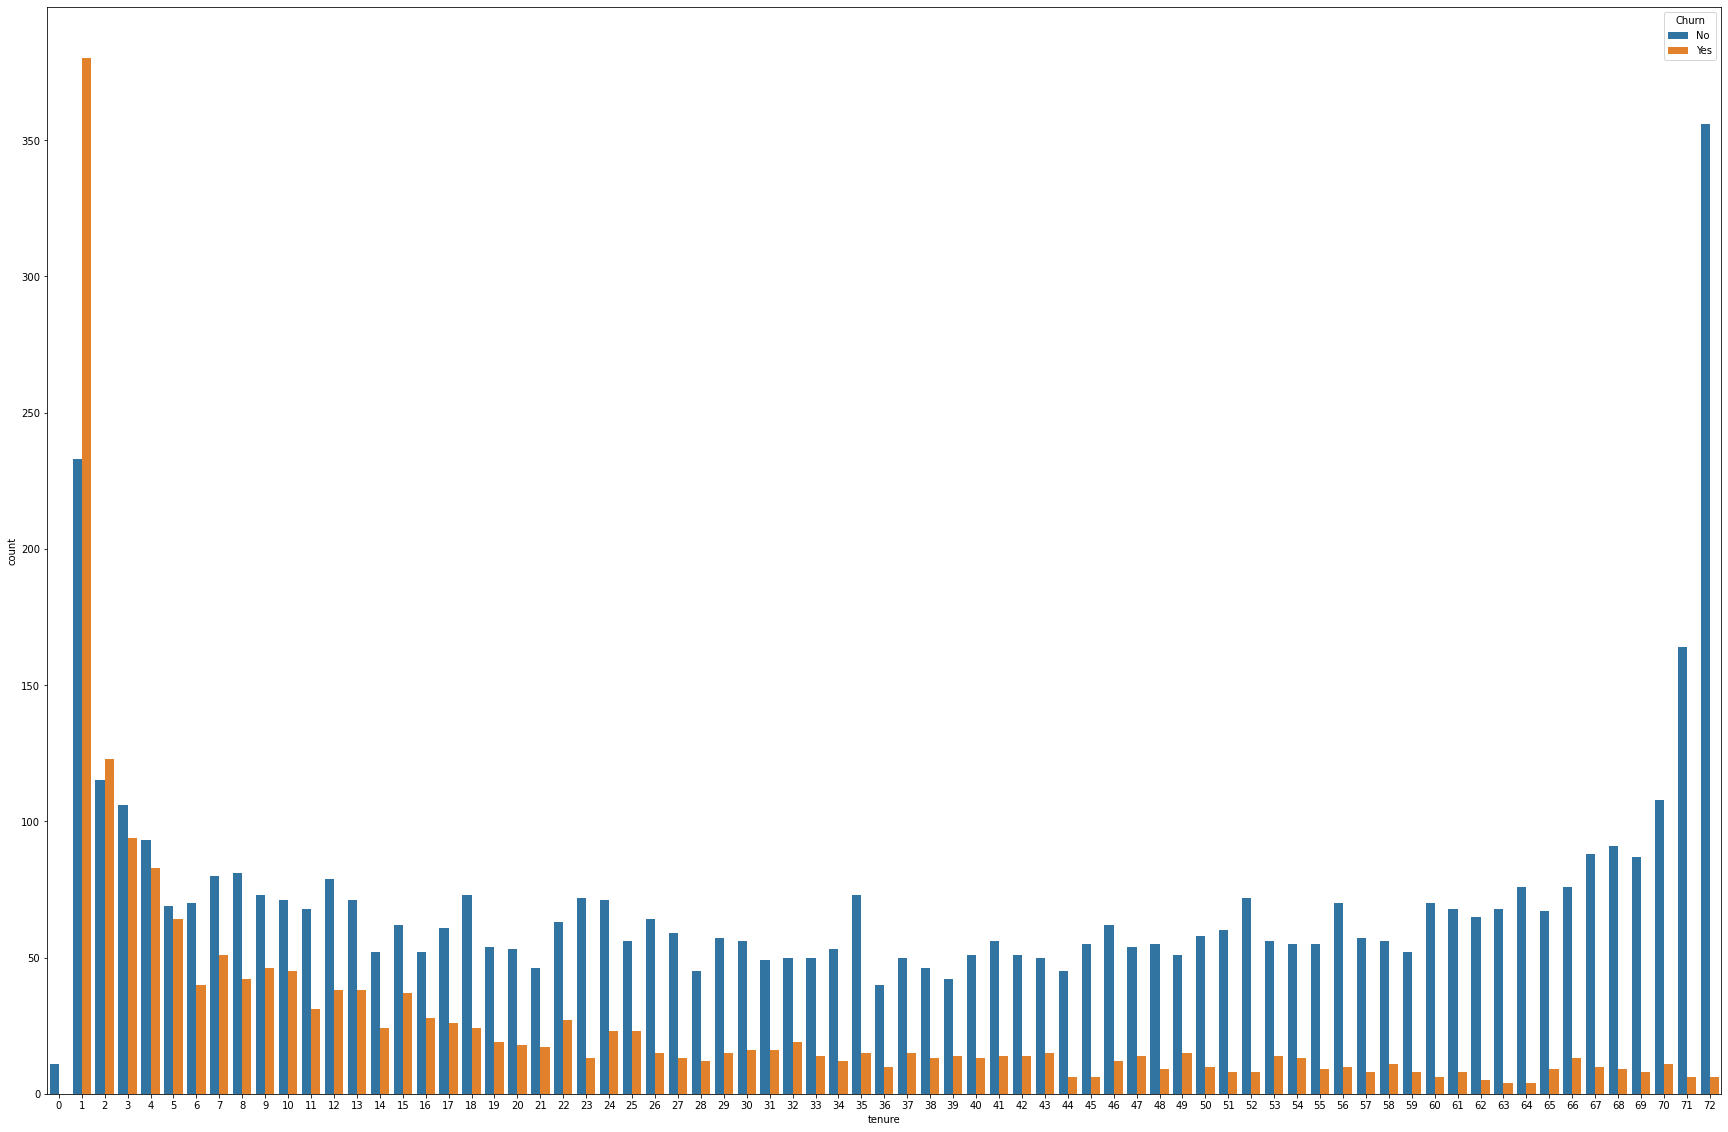

In [83]:
plt.subplots(figsize=(30,20))
sns.countplot('tenure', hue= 'Churn', data= df)

Observations: Maximum rate of customers churn when tenure period is 1, also as tenure period is increases rate of customer churn decreases.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ADB27E760>,
      dtype=object)

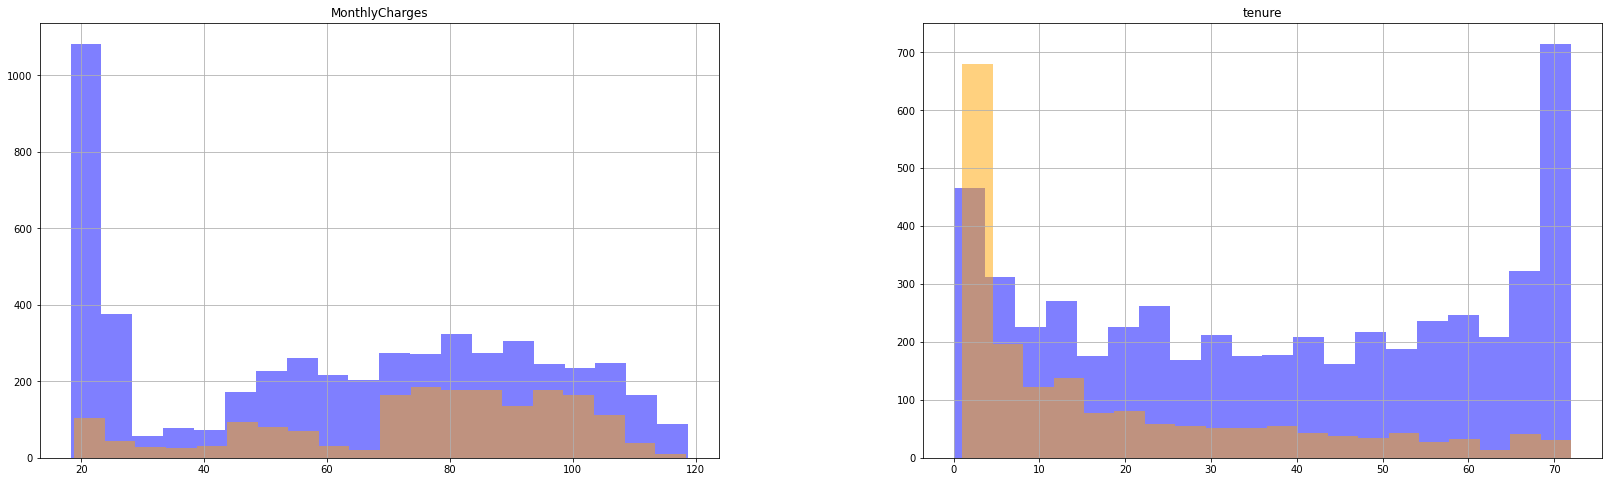

In [84]:
numerical_features= ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28,8))
df[df.Churn == 'No'][numerical_features].hist(bins=20, color= 'blue', alpha= 0.5, ax = ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color= 'orange', alpha= 0.5, ax = ax)

Observations: Rate of customer which are not getting Churn is more if monthlyCharges are low. also as tenure period is increases rate of customer churn decreases.

In [85]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0


In [86]:
df= df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0


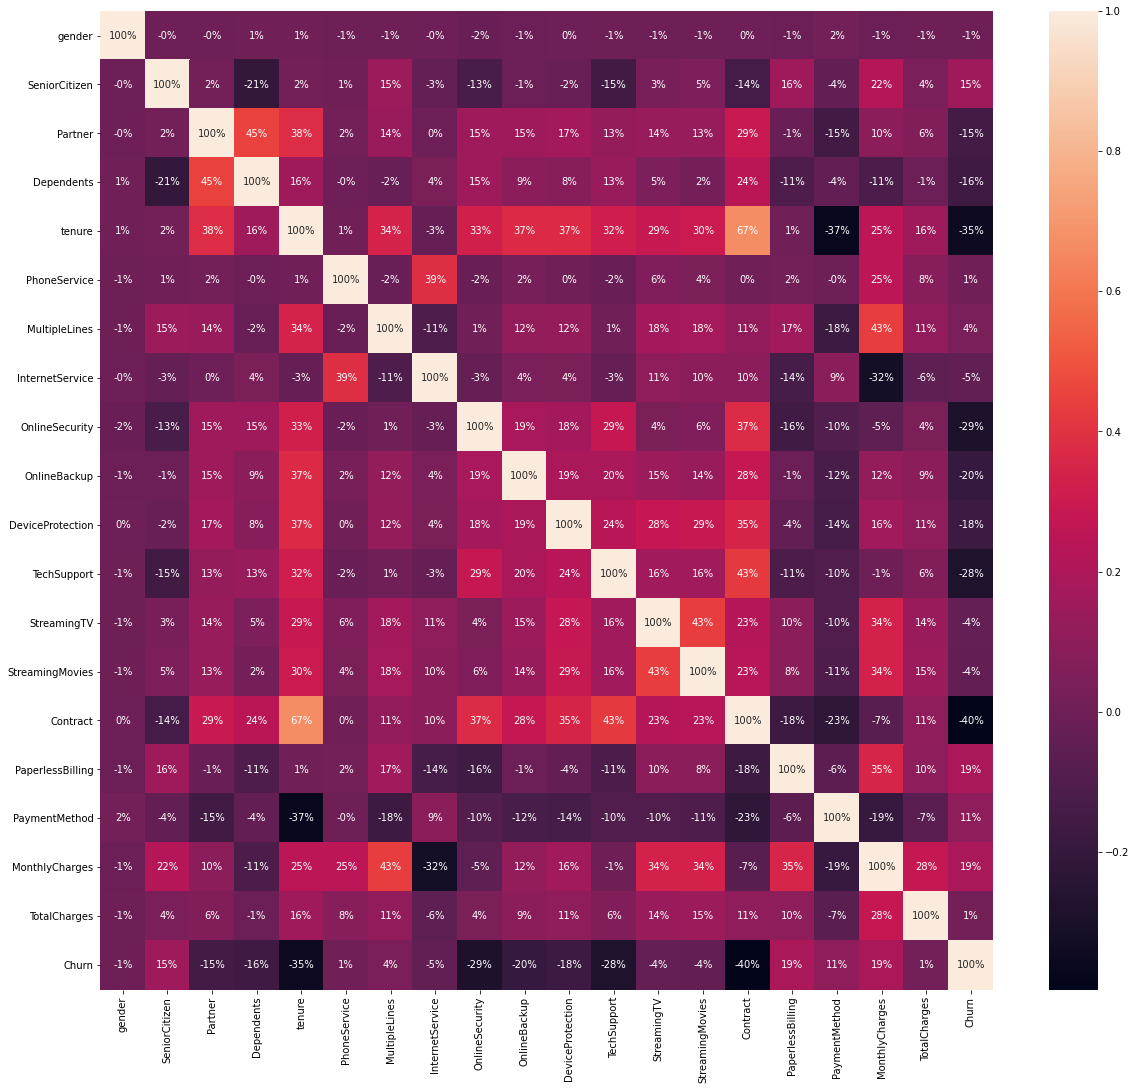

In [87]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

Observations: Customer churn is highly positively correlated to MonthlyCharges, and highly negatively correlated to tenure and Contract.

gender                  AxesSubplot(0.125,0.71587;0.0824468x0.16413)
SeniorCitizen        AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Partner              AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Dependents           AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
tenure               AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
PhoneService         AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
MultipleLines        AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
InternetService      AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
OnlineSecurity         AxesSubplot(0.125,0.518913;0.0824468x0.16413)
OnlineBackup        AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
DeviceProtection    AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
TechSupport         AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
StreamingTV         AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
StreamingMovies     AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
Contract            AxesSubplot(0.

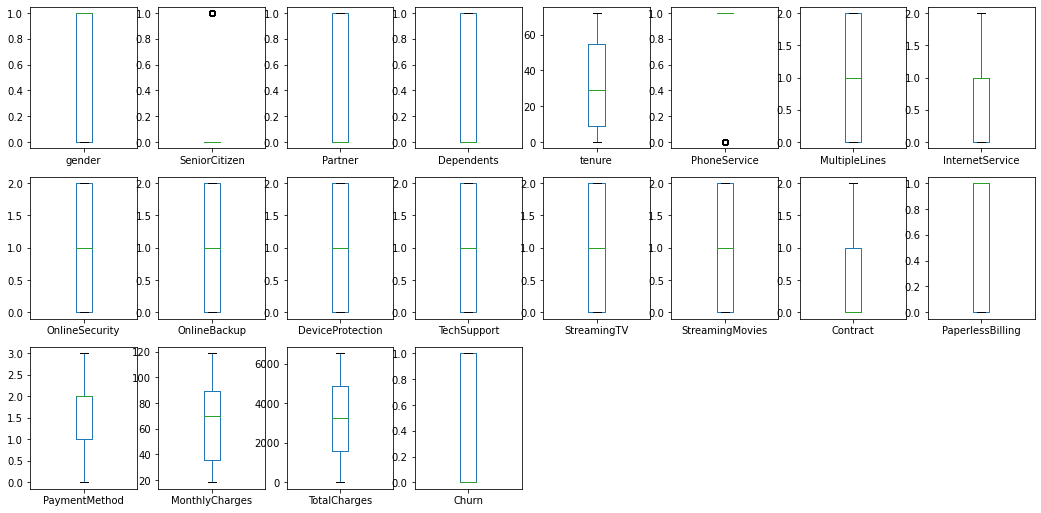

In [88]:
#Checking for the Outliers

df.plot(kind= 'box', subplots= True, layout= (4,8), figsize=(18,12))

Observations: We can see that there is no outliers present in all columns.

In [89]:
#Splitting DATA

x= df.drop('Churn', axis=1)
y= df[['Churn']]
print(x.shape)
print(y.shape)

(7043, 19)
(7043, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ADD077940>,
      dtype=object)

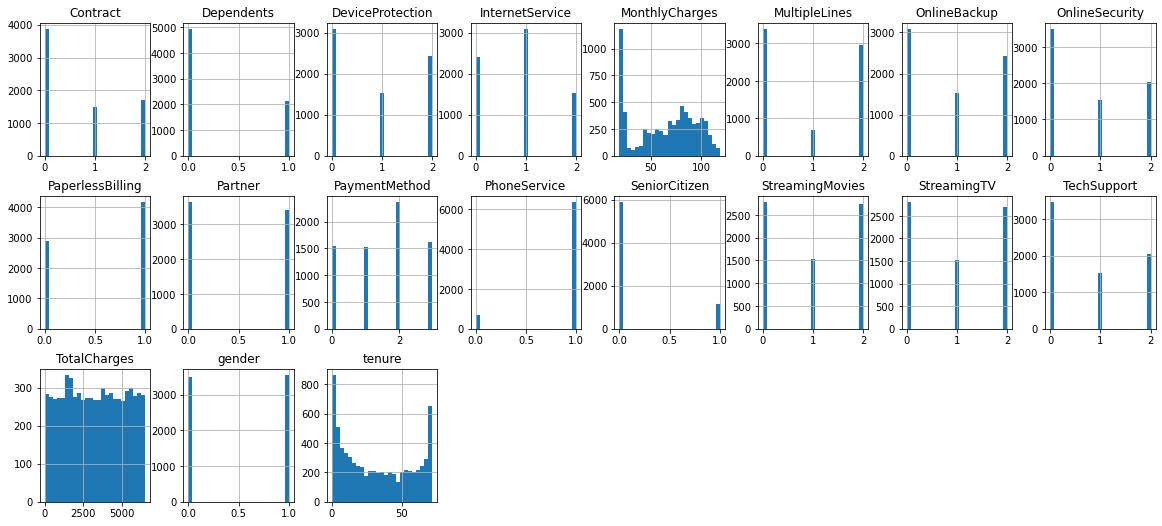

In [90]:
x.hist(figsize=(20,12), layout= (4,8), grid= True, bins=25)

Observations: Columns MonthlyCharges and tenure are somewhat left skewed.

In [91]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
dtype: float64

In [92]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0


In [93]:
y

,Churn
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
7038,0.0
7039,0.0
7040,0.0
7041,1.0


In [94]:
#Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaledX= scaler.fit_transform(x)
new_x= pd.DataFrame(data=scaledX, columns= x.columns)
x=new_x
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.398608
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.948762
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.641883
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.983710
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.235224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.879397
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.292099
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.139680
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.316534


In [95]:
#Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import joblib
import warnings
warnings.filterwarnings('ignore')

In [96]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=i)
    lg= LogisticRegression()
    lg.fit(x_train, y_train)
    pred_lg= lg.predict(x_test)
    acc= accuracy_score(y_test, pred_lg)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.8239469947941316
24


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3, random_state=24)

In [98]:
x_train.shape

(4930, 19)

In [99]:
x_test.shape

(2113, 19)

In [100]:
lg= LogisticRegression()
gnb= GaussianNB()
svc= SVC()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
rf= RandomForestClassifier()
ad= AdaBoostClassifier()
xgb= XGBClassifier()

models= [lg, gnb, svc, knn, dtc, rf,ad, xgb ]

for m in models:
    m.fit(x_train, y_train)
    predict= m.predict(x_test)
    print(m, 'Acuracy score -')
    print(accuracy_score(y_test, predict))
    print()

LogisticRegression() Acuracy score -
0.8239469947941316

GaussianNB() Acuracy score -
0.7600567912920019

SVC() Acuracy score -
0.8154283009938476

KNeighborsClassifier() Acuracy score -
0.7723615712257453

DecisionTreeClassifier() Acuracy score -
0.7269285376242309

RandomForestClassifier() Acuracy score -
0.8106956933270232

AdaBoostClassifier() Acuracy score -
0.8196876478939896

[22:40:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child

In [101]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_m= cross_val_score(m, x,y, cv=5)
    print('CV score of ',m,  scr_m.mean())
    print()
    print()

CV score of  LogisticRegression() 0.8033525348409574


CV score of  GaussianNB() 0.755501867055939


CV score of  SVC() 0.7976728337312085


CV score of  KNeighborsClassifier() 0.7511003734111878


CV score of  DecisionTreeClassifier() 0.7248326504935803


CV score of  RandomForestClassifier() 0.7969628080843926


CV score of  AdaBoostClassifier() 0.8026412994386736


[22:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:09

Observations: From above we can observe that for AdaBoostClassifier model there is less difference in accuracy_score and cross validation accuracy_score so we will select AdaBoostClassifier model for final predictions.

In [102]:
#Hyperparameter Tuning for Best selected model AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

parameters= {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1,1]}
GSV= GridSearchCV(ad, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [103]:
GCV_pred= GSV.best_estimator_.predict(x_test)
print('accuracy_score - ', accuracy_score(y_test, GCV_pred))
print(confusion_matrix(y_test, GCV_pred))
print(classification_report(y_test, GCV_pred))

accuracy_score -  0.8163748225272125
[[1472  113]
 [ 275  253]]
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      1585
         1.0       0.69      0.48      0.57       528

    accuracy                           0.82      2113
   macro avg       0.77      0.70      0.72      2113
weighted avg       0.80      0.82      0.80      2113



In [104]:
# Plotting AUC-ROC curve for best model-  AdaBoostClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [105]:
y_pred_prob= GSV.best_estimator_.predict_proba(x_test)[:,1]
y_pred_prob

array([0.51569452, 0.45078018, 0.50605732, ..., 0.42198371, 0.50562327,
       0.47425706])

In [106]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

In [107]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00126183, 0.00189274, 0.00189274,
       0.00189274, 0.00189274, 0.00252366, 0.00252366, 0.00252366,
       0.00252366, 0.00252366, 0.00378549, 0.00378549, 0.0044164 ,
       0.0044164 , 0.0044164 , 0.0044164 , 0.00504732, 0.00504732,
       0.00567823, 0.00630915, 0.00694006, 0.00694006, 0.00694006,
       0.00694006, 0.00694006, 0.00757098, 0.00757098, 0.00757098,
       0.00757098, 0.00820189, 0.00820189, 0.01009464, 0.01009464,
       0.01135647, 0.01135647, 0.0126183 , 0.0126183 , 0.0126183 ,
       0.0126183 , 0.01324921, 0.01388013, 0.01388013, 0.01514196,
       0.01514196, 0.01514196, 0.01766562, 0.01892744, 0.01892744,
       0.01955836, 0.02018927, 0.02018927, 0.02082019, 0.02082019,
       0.0214511 , 0.0214511 , 0.02271293, 0.02271293, 0.02334385,
       0.02334385, 0.02397476, 0.02397476, 0.02397476, 0.02523659,
       0.02586751, 0.02586751, 0.02649842, 0.02649842, 0.02712

In [108]:
tpr

array([0.        , 0.00189394, 0.00378788, 0.00757576, 0.01325758,
       0.01704545, 0.01893939, 0.02651515, 0.03409091, 0.04545455,
       0.04924242, 0.05492424, 0.05492424, 0.05871212, 0.06060606,
       0.06628788, 0.07386364, 0.08901515, 0.09090909, 0.09090909,
       0.09469697, 0.09848485, 0.10227273, 0.10606061, 0.11363636,
       0.11363636, 0.1155303 , 0.12310606, 0.12689394, 0.13068182,
       0.13257576, 0.13636364, 0.13636364, 0.14015152, 0.14393939,
       0.15151515, 0.15530303, 0.15719697, 0.15719697, 0.16477273,
       0.17045455, 0.17234848, 0.17234848, 0.17613636, 0.18181818,
       0.19318182, 0.19318182, 0.1969697 , 0.19886364, 0.20265152,
       0.20643939, 0.20833333, 0.21401515, 0.21401515, 0.21780303,
       0.22159091, 0.22159091, 0.22537879, 0.22537879, 0.22916667,
       0.22916667, 0.23295455, 0.23295455, 0.23484848, 0.23484848,
       0.24431818, 0.24621212, 0.25189394, 0.25378788, 0.25378788,
       0.25378788, 0.2594697 , 0.2594697 , 0.26325758, 0.26515

In [109]:
thresholds

array([1.53972014, 0.53972014, 0.53887658, 0.53758183, 0.53154323,
       0.53141987, 0.53087166, 0.52962561, 0.52927663, 0.52669768,
       0.5261889 , 0.52575281, 0.5253903 , 0.52539001, 0.5251856 ,
       0.52494154, 0.52343828, 0.52279527, 0.52254486, 0.52248104,
       0.52225794, 0.52213434, 0.52142628, 0.52129142, 0.52068138,
       0.52059236, 0.52033382, 0.52004293, 0.51994861, 0.51969329,
       0.51949127, 0.51930516, 0.518735  , 0.51866163, 0.51864545,
       0.51715685, 0.51689394, 0.51657941, 0.51657336, 0.51624728,
       0.51611876, 0.51599357, 0.5159442 , 0.51591327, 0.51590759,
       0.51535075, 0.51534863, 0.51519589, 0.51509788, 0.51494619,
       0.51493087, 0.51489269, 0.51486933, 0.51459468, 0.51451186,
       0.51443032, 0.51436524, 0.51413918, 0.5141364 , 0.51381368,
       0.51344367, 0.51326219, 0.51320134, 0.51306038, 0.51303767,
       0.51266328, 0.51255028, 0.51240512, 0.5123522 , 0.51222362,
       0.51204756, 0.51179348, 0.51158889, 0.51145316, 0.51145

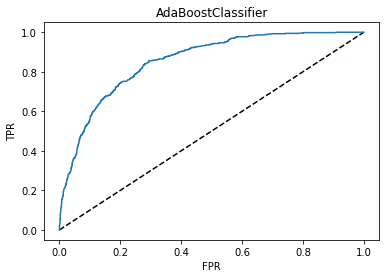

In [110]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'AdaBoostClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AdaBoostClassifier')
plt.show()

Observations: We can observe that A plot of the ROC Curve confirms the AUC interpretation of a best model for most probability thresholds.

In [111]:
print(roc_auc_score(y_test, GSV.best_estimator_.predict(x_test)))

0.7039366456361725


In [112]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'Customer_Churn_Analysis_best_ad_model.obj')

['Customer_Churn_Analysis_best_ad_model.obj']

Conclusion: For Analysis of Customer_Churn_Analysis project we have selected AdaBoostClassifier model which having accuracy 82%.